
 <img src="images/logo.jpg" width="240" height="240" align="center"/>
 
# ProgDA_Project

# Module: Programming for Data Analysis

# Lecturer: Brian McGinley 

# Student ID:G00376465

## Introduction
 The Objective of this project is
 
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 
    - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Real-world phenomenon 

I decide to look at the sociodemographic factors effecting health of people in Ireland. The link between general health and socio-economic status is well established.I started with CSO.ie statistics and looking at the databases available online.After looking at lots of resources.I decide on the variables that I would like to add in the dataset. As there are so many factors that effect health but I choose few of them.

I select following factors for creating the dataset. I use the cso.ie website and slan 2007 report to get statistics about the variables.

**Gender:** 
    <br>It is a  categorical variable with values (Male, Female)
    
**Age:**
    <br>It is a categorical variable

**Education:**
    <br>It is a  categorical variable with values (Primary, Post Primary, Third Level)
    
**Medical card & Insurance:**
    <br>It is a  categorical variable.
    
**Work Situation:**
    <br>It is a  categorical variable.
    
**Marital Status:**
    <br>It is a  categorical variable with values( Single, Cohabitant, Married, Separated, Divorced, Widowed)
    
**Residential Area:**
     <br>It is a  categorical variable.
     
**Household Income:**
     <br>It is a  numerical variable.
     
**Social Class:**
     <br>It is a  categorical variable.

## Simulate Dataset

### Import Libraries

In [1]:
#import libraries
#Pandas is a software library for data maniupulation & analysis.
import pandas as pd
#Numpy is a python library useful for multi-dimensional arrays & matrices, along with functions to operate on arrays.
import numpy as np
#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size



In [130]:
data1 = ['GENDER: Female, Male',
         'AGE: years',
         'EDUCATION:',
         'MEDICAL_CARD',
         'WORK_SITUATION: ',
         'MARITAL_STATUS: ',
         'AREA: ',      
         'INCOME: ',
         'SOCIAL_CLASS:'
]
short_names = [d.split(':')[0] for d in data1]
#create the dataset
data=pd.DataFrame(columns = short_names)

data

,GENDER,AGE,EDUCATION,MEDICAL_CARD,WORK_SITUATION,MARITAL_STATUS,AREA,INCOME,SOCIAL_CLASS


## GENDER

Gender is a categorical variable, it has two categories male and female. In this dataset the number of males and females are not equal.

numpy.random.choice() is used to generates a random sample from  list gender that has two values ['male','female] .there are many health conditions that vary with gender therefore gender is an important variable.

In [131]:
np.random.seed(256) # Set the random seed
gender=['Male','Female']

data['GENDER']= np.random.choice(gender,1000,p=[0.495,0.505])

data['GENDER'].value_counts()

Female    504
Male      496
Name: GENDER, dtype: int64

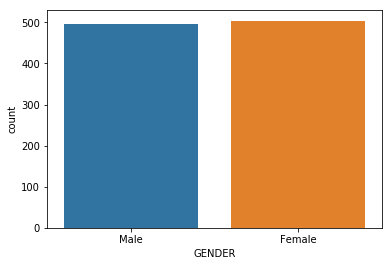

In [132]:
sns.countplot(x=data['GENDER'])

## AGE 
Age column data is a categorical data. 

To simulate the data for age column use numpy.random.choice  .

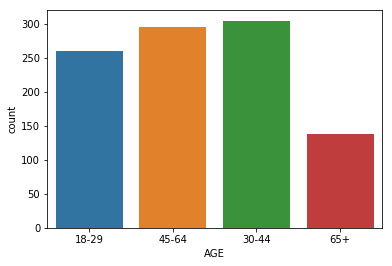

In [133]:
np.random.seed(256) # Set the random seed
#data['AGE'] = np.random.randint(25,65, size= 1000,dtype='int')# use np.random.randint to generate number between 25-64 from uniform distribution
age=['18-29','30-44','45-64','65+']
data['AGE'] = np.random.choice(age, 1000, p=[0.25,0.31,0.29,0.15])
#data = data.astype({"AGE": int})
#fig= plt.figure(figsize=(10,6))
sns.countplot(data['AGE'])

# In first attempt i used the following code as i think of numeric data 
#but than i changed to categories as i found slan statistics better
###data['AGE'] = np.random.randint(25,45, size= 1000,dtype='int')


## Education
Education is very important indicator of socioeconomics class  and health. As people with higher education are more aware of issue like healthy eating ,healthy lifestyle and mental health.
the data in the column is correspondent to the cso.ie statisics about education
<img src="images\Education.PNG"  align="center"/>

but according to the respondents of slan 2007 report



In [134]:
np.random.seed(256)

Edu= ['Primary','Post Primary','Third Level']
#source: https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/
data['EDUCATION']= np.random.choice(Edu, 1000, p=[0.196,0.44,0.364])
data.tail(5)


,GENDER,AGE,EDUCATION,MEDICAL_CARD,WORK_SITUATION,MARITAL_STATUS,AREA,INCOME,SOCIAL_CLASS
995,Female,45-64,Post Primary,NaN,NaN,NaN,NaN,NaN,NaN
996,Female,45-64,Post Primary,NaN,NaN,NaN,NaN,NaN,NaN
997,Male,30-44,Post Primary,NaN,NaN,NaN,NaN,NaN,NaN
998,Female,45-64,Third Level,NaN,NaN,NaN,NaN,NaN,NaN
999,Male,30-44,Post Primary,NaN,NaN,NaN,NaN,NaN,NaN


## Medical Card and Insurance
1. has a Medical card
2. has a private Insurance
3. Medical card and Insurance
4. No Medical card No Insurance

In [135]:
np.random.seed(256)

medical= ['has a Medical card','has a private Insurance','Medical card and Insurance','No Medical card No Insurance']
#source: https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/
data['MEDICAL_CARD']= np.random.choice(medical, 1000, p=[0.32,0.40,0.075,0.205])

## Work Situation
 
1. Employee, including apprenticeship or community employment 49.0
2. Self-employed 8.5
3. Farmer 9.0 
4. Student full-time 5.7 
5. On State training scheme 0.7 Marital status 
6. Not in paid employment,  actively looking for a job 3.9
7. Long-term sickness or disability 2.8 
8. Home duties,  looking after the home 
9. Retired 
10. Other 


In [144]:

np.random.seed(256) # Set the random seed
emp=['Employee','Self Employed','Farmer','Student full-time','On State training scheme','looking for a job',
     'Long-term sickness/disability','Home duties','Retired','Other']
data['WORK_SITUATION']= np.random.choice(emp, 1000, p=[0.50,0.089,0.009,0.057,0.007,0.039,0.028,0.165,0.098,0.008])


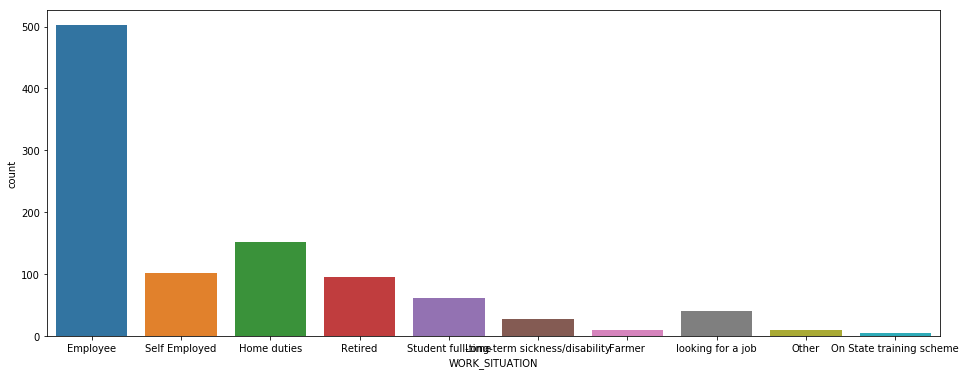

In [145]:
fig= plt.figure(figsize=(16,6))
sns.countplot(data['WORK_SITUATION'])
#sns.distplot(data. == 'Unemployed')
plt.show()

## Marital Status
Marital status is a categorical data column that has values from list ['Single','Cohabiting','Married','Separated','Divorced','Widowed']

The percentage is from the cso.ie data source
- Single 35.8%
- Cohabiting 5.6 %
- Married (47.9%)
- Separated (2.6%) 
- Divorced (1.6%)
- Widowed (6.6%)


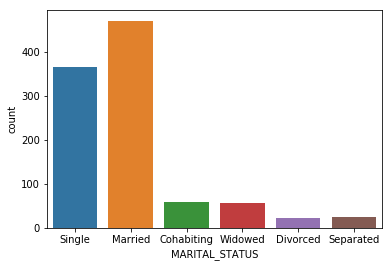

In [138]:
np.random.seed(256) # Set the random seed
ms =['Single','Cohabiting','Married','Separated','Divorced','Widowed']
data['MARITAL_STATUS']= np.random.choice(ms, 1000, p=[0.358,0.056,0.479,0.026,0.016,0.065])
sns.countplot(data['MARITAL_STATUS'])

## Residential Location

<img src="images\urban&rural.PNG" align="center"/>

cso.ie statistics is used as probability that state 63% people lives in urban area and 37% lives in rural area.
1. In open country (rural) 30.6 
2. In a village (rural) 10.0 
3. In a town (1,500+) (urban) 23.5
4. In a city (other than Dublin) (urban) 11.2
5. In Dublin City or County (urban) 24.7 

np.random.choice() is used to get values randomly and it is a categorical data column


In [139]:
np.random.seed(256)
Area = ['In open country (rural)','In a village (rural)','In a town (1,500+) (urban)',
        'In a city (other than Dublin) (urban)','In Dublin City or County']
#source:https://www.cso.ie/en/releasesandpublications/ep/p-cp2tc/cp2pdm/
data['AREA']= np.random.choice(Area, 1000, p=[0.306,0.10,0.235,0.112,0.247])
#data

## Household income
- Under €10,000  3.9%
- €10,000 – €19,000 15.4%
- €20,000 – €29,999 17.3%
- €30,000 – €39,999 16.7%
- €40,000 – €49,999 16.8%
- €50,000 or more 30.0%

The equivalised household (HH) income is calculated based on the above figures using the national equivalence scale (Callan et al, 1996). The equivalised HH income (units: weekly net household incomes) adjusts for household size such that the needs of the composition of households are taken into account. The national equivalence scale used here attributes a weight of 1 to the first adult, 0.66 to each subsequent adult and 0.33 to each child.12 For analysis purposes, the equivalised income is split into quintiles, from the highest income quintile to the lowest income quintile.


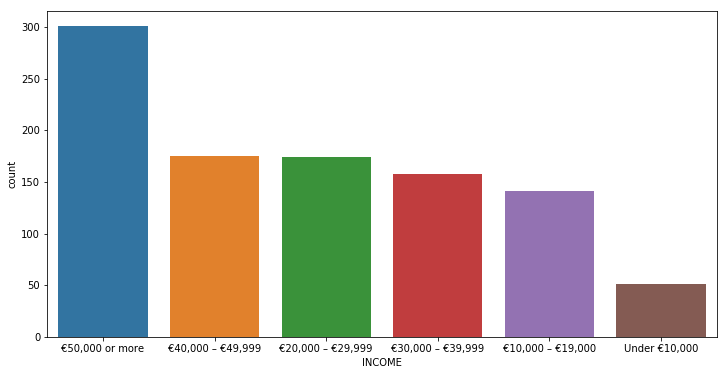

In [140]:
hincome= ['Under €10,000','€10,000 – €19,000','€20,000 – €29,999','€30,000 – €39,999','€40,000 – €49,999','€50,000 or more']
data['INCOME']= np.random.choice(hincome, 1000, p=[0.039,0.154,0.172,0.167,0.168,0.30]) 
fig= plt.figure(figsize=(12,6))
sns.countplot(data['INCOME'])

In [141]:
#data['INCOME'] = data.GENDER.apply(lambda x: np.random.randint(2200,3000) if x == 'Female' else np.random.randint(3000,4000)).ffill().astype(float)


In [146]:
data.head(5)

,GENDER,AGE,EDUCATION,MEDICAL_CARD,WORK_SITUATION,MARITAL_STATUS,AREA,INCOME,SOCIAL_CLASS,EMPLOYMENT_STATUS
0,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",NaN,Employee
1,Female,45-64,Post Primary,has a private Insurance,Self Employed,Married,"In a town (1,500+) (urban)","€40,000 – €49,999",NaN,Self Employed
2,Male,18-29,Post Primary,has a Medical card,Employee,Single,In open country (rural),"€20,000 – €29,999",NaN,Employee
3,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",NaN,Employee
4,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",NaN,Employee


## General Health

According to Eurostat, people's perception of general health in Ireland is dependant upon their income. The median value for gross earned income per person with "very good" health was €27,579 compared to €11,700 per person who described their health as "very bad".

- 84.2% good health
- 3.3%very bad and bad
- 12.5% fair 
source https://ec.europa.eu/eurostat/cache/infographs/qol/index_en.html

# Social Class

The entire population is classified into one of the following social class groups (introduced in 1996) which are defined on the basis of occupation (coded using Soc90):
1. Professional workers
2. Managerial and technical
3. Non-manual
4. Skilled manual
5. Semi-skilled
6. Unskilled
7. All others gainfully occupied and unknown

The occupations included in each of these groups have been selected in such a way as to bring together, as far as possible, people with similar levels of occupational skill.

In determining social class no account is taken of the differences between individuals on the basis of other characteristics such as education. Accordingly social class ranks occupations by the level of skill required on a social class scale ranging from 1 (highest) to 7 (lowest). This scale combines occupations into six groups by occupation and employment status following procedures similar to those outlined above for the allocation of socio-economic group. A residual category “All others gainfully occupied and unknown” is used where no precise allocation is possible.
source:https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/bgn/

For dataset we are using 4 categories these
SC 1-2 (Upper) 31.4% 
SC 3-4 (Middle) 37.6%
SC 5-6 (Lower) 16.1% 
Unclassified 14.9%

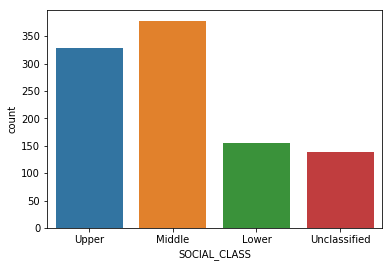

In [148]:
np.random.seed(256) # Set the random seed
a=['Upper','Middle','Lower','Unclassified']
data['SOCIAL_CLASS']= np.random.choice(a, 1000, p=[0.314,0.376,0.161,0.149])
sns.countplot(data['SOCIAL_CLASS'])

In [149]:
data.head(5)

,GENDER,AGE,EDUCATION,MEDICAL_CARD,WORK_SITUATION,MARITAL_STATUS,AREA,INCOME,SOCIAL_CLASS,EMPLOYMENT_STATUS
0,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",Upper,Employee
1,Female,45-64,Post Primary,has a private Insurance,Self Employed,Married,"In a town (1,500+) (urban)","€40,000 – €49,999",Middle,Self Employed
2,Male,18-29,Post Primary,has a Medical card,Employee,Single,In open country (rural),"€20,000 – €29,999",Upper,Employee
3,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",Upper,Employee
4,Male,18-29,Primary,has a Medical card,Employee,Single,In open country (rural),"€50,000 or more",Upper,Employee


There is a significant divide in earnings from county to county. The Central Statistics Office (CSO) numbers show that the average income for Irish households stood at €45,256 in 2016.

The Dublin coastal town of Malahide had the highest average income of €78,631 of all 41 towns in the country with a population of 10,000 or over.

Celbridge in Co Kildare had the second highest at €64,877 while Maynooth was third at €64,529. The towns with the lowest average incomes were Longford at €29,224, Enniscorthy, Co Wexford, at €31,049 and Ballina, Co Mayo, with €32,779.

Dublin City had the highest earned income per person at €39,999, followed by Dún Laoghaire-Rathdown, €37,117, and Cork City, €34,317.

The lowest earned incomes per person by county were in Donegal at €24,626, Monaghan at €24,903 and Leitrim at €25,962. The figures showed that 42.3% of households had two or more people earning an income, while 30.1% had just one member earning a wage.

An average of 27% of households throughout the country had no income earners at all. Social welfare payments to people of working age made up more than half of the income in 13.7pc of households. while the State pension formed the majority of income in 12.9 %. This gave a total of 26.6pc of households where social welfare made up more than half of household income in Ireland in 2016.Households where the occupants were in the medical, finance, legal and IT professions enjoyed the highest incomes, while farmers, care workers and home carers earned under €30,000. gender The data also showed a significant gender gap in some professions. In the financial managers and directors' sector, female income was €60,126 compared with €94,500 for males. 

In contrast, the primary and nursery teaching professions had the smallest gender gaps.The CSO revealed that those who travel farthest to work also earn the most. The average worker driving less than 30 minutes to work earns €32,004 a year,
 compared with €41,495 for those travelling more than 30 minutes.Those who described their health as "very bad" earned an average of €11,700, but those who earned more than €27,579 reported their health as "very good".
 
source: https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html


**NOTE:

**I was thinking that it would be easy to generate this dataset but it was so wide that I feel my research was not enough and as I didn't complete the statistics module understanding the probability distributions was a challenge.In my research I found that there are so many factors involved in health and wellbeing but most of it is categorical data and very wide. Only one thing was for definite people who earn more are healthier than people who earn less.**

**As I was interested in a health related dataset and in my research It came across a dataset about Adolescent Sleep. It was not that wide and I decided to work on that. I could not find the exact data but I got the statistics so I decided to build it.**

# Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour
I decide to simulate the dataset that was based on a research.This research  was about Adolesents sleep and its association with social media ,mental health and problem behaviour. I have the statistics of this data to generate the dataset. that I found from the following source.

Dataset statistics available at (Source): https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

In [19]:
#import libraries
import pandas as pd

import numpy as np
#import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

In [20]:
#create a DataFrame
s_data=pd.DataFrame()

## Age 
This research was on the kids age 13 to 17. 
This column has age value of kids from 13 -18 with 17 as mean. I used np.random.randint() to create an sample of 2028 numbers range from 13-18

[13 15 14 ... 14 16 17]
14.952169625246547


C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


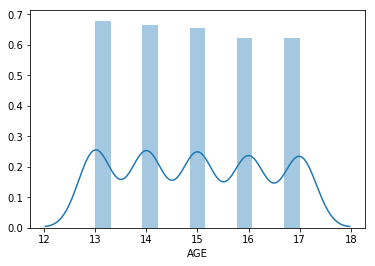

In [21]:
#Age 13-18 15mean
np.random.seed(256) # Set the random seed
# create a random number between 13-17 included. with mean age 15.

age= np.random.randint(13,18, size= 2028,dtype='int')

# I try to use the triangular distribution for age columnbut than leave it because feel randint is fine
#age=np.random.triangular(13, 15, 17, 2028)

s_data['AGE'] =age
# print age series
print(age)
#print the mean age
print(s_data['AGE'].mean())
#age dist plot
sns.distplot(s_data['AGE'])

plt.show()

## Gender

As this data is base on a survey and the respondents in that research were 51.1% females and 48.9% males. so I I use np.random.choice with given probabilities. 

In [22]:
#Gender male= 48.9% female= 51.1%
np.random.seed(256) # Set the random seed
#create a list
gender=['Male','Female']
#np.random.choice to populate the gender column
s_data['GENDER']= np.random.choice(gender, 2028,p=[0.489,0.511])
#print the number of males and females in Gender column
s_data['GENDER'].value_counts()

Female    1031
Male       997
Name: GENDER, dtype: int64

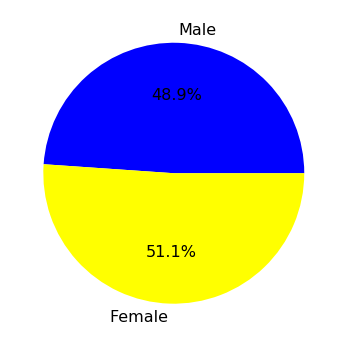

In [23]:
# Pie Plot of gender
fig= plt.figure(figsize=(6,6))# set the plot size
plt.pie([0.489, 0.511], labels=['Male', 'Female'], colors=['blue','yellow'],
autopct='%1.1f%%', textprops={'fontsize': 16})
plt.show()


## Social media use
To measure the time spent on social media participants were asked the following question “How much time on average do you spend on the following: Being on social media on the internet for example on Facebook, Twitter, Instagram, Vine, Tumblr,
WhatsApp, Snapchat, Skype” the response to the question ranged from 1 (almost no time) to 8 (6 hours or more). When processing the date a change was made and the responses were combined into three groups; those that answered Almost no time, thirty minutes to an hour and around one hour, were combined and called Little time. Those who answered around two hours and around three hours were combined and called Average time and finally those that answered, around four hours, around five hours and six hours or more were combined and called Long time. This was done on the basis of a study by Mediakix (2017) stating that the
average person spends around 116 minutes a day on social media. (Source): https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

It is a categorical data and numpy.random.choice is used to draw the samples

In [24]:
# these are the statistics in the dataset,Little time 55.5% (1,077) ,Average time 30.4% (589), Long time 14.1% 
np.random.seed(256) # Set the random seed
#create a list of time on media categories
smedia=['Little Time','Average Time','Long Time']
#np.random.choice method is used to generate data from list according to the given probabilities
s_data['MEDIA']= np.random.choice(smedia, 2028,p=[0.56,0.30,0.14])
# print the number value count of media column
s_data['MEDIA'].value_counts()



Little Time     1130
Average Time     617
Long Time        281
Name: MEDIA, dtype: int64

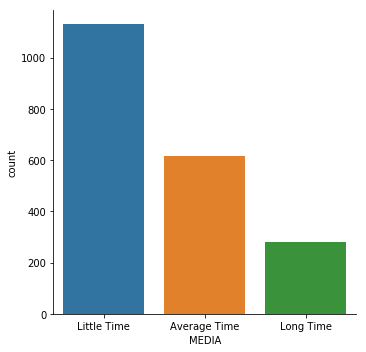

In [25]:
# Plot of media use
sns.catplot(x="MEDIA", kind="count" ,data=s_data);
plt.show()

## Sleep
To measure participant’s sleep they were asked the following question: “How many hours on average do you normally sleep at night?” And the following answers were available: 9 hours or more, around 9 hours, around 8 hours, around 7 hours, around 6 hours,6 hours or less. When processing the data a change was made and the six categories were combined into two groups, Sufficient sleep and Insufficient sleep. This was done according to official sleep recommendations for this age group (14-17 years old) which states that seven to eleven hours of sleep is appropriate but anything below is not (Hirshkowitz et al., 2015).

In [26]:
# sufficient sleep 86.5 Insufficient sleep 13.5. The Sufficient sleep
#np.random.seed(256) # Set the random seed
#create list
sleep=['Sufficient_sleep','Insufficient_sleep']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.MEDIA[idx] == 'Long Time':#check if the media use column have long time
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.70,0.30])#select from sleep list to add value in sleep column
        
    if s_data.MEDIA[idx] == 'Average Time':
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.85,0.15])
        
    if s_data.MEDIA[idx] == 'Little Time':
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.87,0.13])
        
#data['SLEEP']= np.random.choice(sleep, 2028,p=[0.865,0.135])
#print the number kids have sufficient and insufficient sleep
s_data['SLEEP'].value_counts()

Sufficient_sleep      1691
Insufficient_sleep     337
Name: SLEEP, dtype: int64

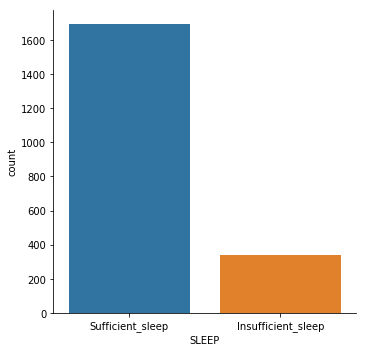

In [27]:
#catplot of sleep data column
sns.catplot(x="SLEEP", kind="count" ,data=s_data);
plt.show()

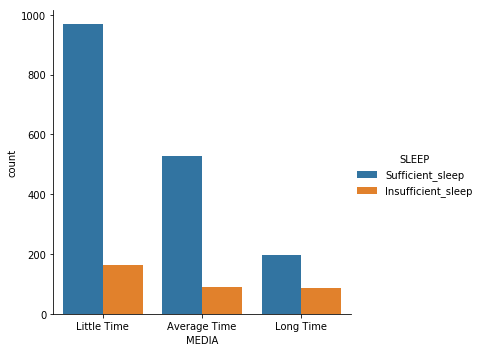

In [28]:
# catplot of media and sleep it shows the people with long time media use are more likely to have insufficient sleep
sns.catplot(x="MEDIA", hue="SLEEP",kind="count" ,data=s_data);
plt.show()

In [29]:
#groupy to see the relationship between media use and sleep
s_data.groupby(['SLEEP','MEDIA']).count()

AGE  GENDER
SLEEP              MEDIA                    
Insufficient_sleep Average Time   90      90
                   Little Time   162     162
                   Long Time      85      85
Sufficient_sleep   Average Time  527     527
                   Little Time   968     968
                   Long Time     196     196

## Mental Health
To measure mental wellbeing participants were asked the following question “How good is your mental health?” and the responses were measured on a 4 point Likert scale, range from 1 (very good) to 4 (bad). as this study is about sleep therefore on the base of sleep we are putting the values in

In [30]:
# Very good 44.1% (876),Good 37.9% (754),Alright 12.5% (248),Bad 5.5% 
#np.random.seed(256) # Set the random seed
mhealth=['Very good','Good','Alright','Bad']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.SLEEP[idx] == 'Sufficient_sleep':
            s_data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.441,0.379,0.125,0.055])
        
    if s_data.SLEEP[idx] == 'Insufficient_sleep':
            s_data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.305,0.32,0.125,0.25])
                           

#data['MENTAL_HEALTH']= np.random.choice(mhealth, 2028,p=[0.441,0.379,0.125,0.055])
# number of observations for mental health categories
s_data['MENTAL_HEALTH'].value_counts()
#s=np.random.lognormal(2.5,1,2000)
#print(s)

Very good    830
Good         783
Alright      236
Bad          179
Name: MENTAL_HEALTH, dtype: int64

In [31]:
#group by sleep and mental health
s_data.groupby(['SLEEP','MENTAL_HEALTH']).count()

AGE  GENDER  MEDIA
SLEEP              MENTAL_HEALTH                    
Insufficient_sleep Alright         47      47     47
                   Bad             92      92     92
                   Good            98      98     98
                   Very good      100     100    100
Sufficient_sleep   Alright        189     189    189
                   Bad             87      87     87
                   Good           685     685    685
                   Very good      730     730    730

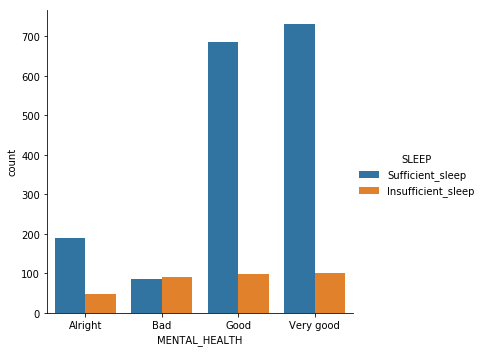

In [32]:
#catplot to show relation of sleep and mental health
sns.catplot(x='MENTAL_HEALTH', hue="SLEEP",kind="count" ,data=s_data);
plt.show()

## Problem Behaviour
A few questions were combined to measure problem behaviour that all involved inappropriate actions such as showing aggression by fighting and skipping school. The following questions were asked: “How often in the last 12 months, did the following of these six statement happen”: break rules at home, broke rules at school, got into a fight, skipped school, fled from home, and got in to trouble for lying and stealing. The Answers were collected using a Likert scale which ranges from 1 (rare/almost never) to 4 (almost always or always). After combining all answers the range reached from 0-24 and the variable was named behaviour. The variable was split into three groups, The first group ranged from 0-6 and was named Low, the second group ranged from 7-12 and was named Medium and the third group range was 13-24 and named High. 

In [33]:
#Low 51.6% (1,022),Medium 45.4% (900),High 3.0% (59)

#np.random.seed(256) # Set the random seed
behaviour=['Low','Medium','High']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.SLEEP[idx] == 'Sufficient_sleep':
            s_data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.52,0.46,0.02])
        
    if s_data.SLEEP[idx] == 'Insufficient_sleep':
            s_data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.41,0.39,0.20])
        
   #data['BEHAVIOUR']= np.random.choice(behaviour, 2028,p=[0.516,0.454,0.03])

s_data['BEHAVIOUR_PROBLEM'].value_counts()


Low       1035
Medium     892
High       101
Name: BEHAVIOUR_PROBLEM, dtype: int64

In [34]:
#groupby sleep and behaviour problem
s_data.groupby(['SLEEP','BEHAVIOUR_PROBLEM']).count()

AGE  GENDER  MEDIA  MENTAL_HEALTH
SLEEP              BEHAVIOUR_PROBLEM                                   
Insufficient_sleep High                76      76     76             76
                   Low                133     133    133            133
                   Medium             128     128    128            128
Sufficient_sleep   High                25      25     25             25
                   Low                902     902    902            902
                   Medium             764     764    764            764

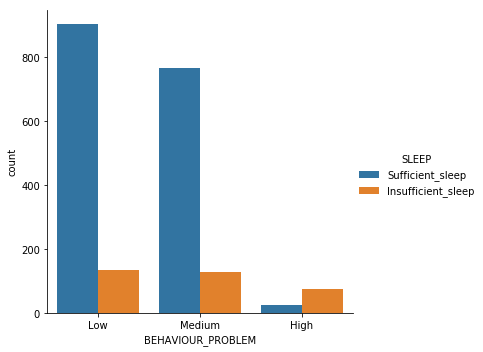

In [35]:
#catplot to show relation between sleep and behaviour problem
sns.catplot(x="BEHAVIOUR_PROBLEM", hue="SLEEP",kind="count" ,data=s_data);
plt.show()

In [36]:
#simulated dataset
s_data

,AGE,GENDER,MEDIA,SLEEP,MENTAL_HEALTH,BEHAVIOUR_PROBLEM
0,13,Male,Little Time,Sufficient_sleep,Alright,Low
1,15,Female,Average Time,Sufficient_sleep,Bad,Medium
2,14,Male,Little Time,Sufficient_sleep,Good,Medium
3,13,Male,Little Time,Sufficient_sleep,Good,Low
4,14,Male,Little Time,Sufficient_sleep,Alright,Medium
5,17,Male,Little Time,Sufficient_sleep,Very good,Low
6,16,Male,Little Time,Insufficient_sleep,Good,Low
7,15,Male,Little Time,Sufficient_sleep,Good,Medium
8,15,Female,Average Time,Sufficient_sleep,Very good,Medium
9,13,Male,Little Time,Sufficient_sleep,Bad,Medium


## Relation between Behaviour and Sleep


In [37]:
#source: https://codingdisciple.com/chi-squared-python.html
#this is the test to find out if there is a  relation between two categorical data columns
contingency_table = pd.crosstab(
    s_data['BEHAVIOUR_PROBLEM'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
BEHAVIOUR_PROBLEM,,,
High,76,25,101
Low,133,902,1035
Medium,128,764,892
All,337,1691,2028


In [38]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values,])
f_obs

array([[ 76,  25],
       [133, 902],
       [128, 764]], dtype=int64)

In [39]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(264.47880015816787, 3.7081582121184175e-58, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'BEHAVIOUR_PROBLEM' and the 'SLEEP' column.According to the research,  Individuals who were in the High frequency problem group were more likely  of getting Insufficient sleep compared to Low group engage of problem behaviour. 

## Relation between Gender and Sleep

In [40]:
s_data.groupby(['GENDER','SLEEP']).count()

AGE  MEDIA  MENTAL_HEALTH  BEHAVIOUR_PROBLEM
GENDER SLEEP                                                           
Female Insufficient_sleep  198    198            198                198
       Sufficient_sleep    833    833            833                833
Male   Insufficient_sleep  139    139            139                139
       Sufficient_sleep    858    858            858                858

In [41]:
contingency_table = pd.crosstab(
    s_data['GENDER'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
GENDER,,,
Female,198,833,1031
Male,139,858,997
All,337,1691,2028


In [42]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

array([[198, 833],
       [139, 858]], dtype=int64)

In [43]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(9.755545007854096, 0.001787826319259483, 1)

 Here it shows there is a relation between gender and sleep. In this research they find that girls are most likely to have insufficient sleep but further studies find there is not a strong relation to support the hypothesis.

## Relation between Mental Health and Sleep

In [44]:
contingency_table = pd.crosstab(
    s_data['MENTAL_HEALTH'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MENTAL_HEALTH,,,
Alright,47,189,236
Bad,92,87,179
Good,98,685,783
Very good,100,730,830
All,337,1691,2028


In [45]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 47, 189],
       [ 92,  87],
       [ 98, 685]], dtype=int64)

In [46]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(138.79044011314778, 7.278449263346988e-31, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MENTAL_HEALTH' and the 'SLEEP' column. According to research those individuals that rated there mental health bad had (56.9%) chance of getting Insufficient sleep compared to only (6%) in the Very good mental health group. 

## Relation between media and sleep

In [47]:
contingency_table = pd.crosstab(
    s_data['MEDIA'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MEDIA,,,
Average Time,90,527,617
Little Time,162,968,1130
Long Time,85,196,281
All,337,1691,2028


In [48]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 90, 527],
       [162, 968],
       [ 85, 196]], dtype=int64)

In [49]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(43.76495431608428, 3.137335183423458e-10, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MEDIA' and the 'SLEEP' column.as that research shows Those that spent a Long time on social media were more likely to get Insufficient sleep (26.4%) compared to those that spent Little time (9.7 %). 

SOURCE: https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence 

In [50]:
#SOURCE: SCIPY2019 working with pandas youtube video
#dummy encoding
#hot encoding
# As we have all categorical data so i decide to  use get dummies
#as age and gender are not main contributers, so drop these two columns
dumy= s_data.drop(columns=['AGE','GENDER'])
# get dummies
dumy=pd.get_dummies(dumy)
##dumy=dumy.drop(['AGE'])
cor=dumy.corr()
dumy.corr()

,MEDIA_Average Time,MEDIA_Little Time,MEDIA_Long Time,SLEEP_Insufficient_sleep,SLEEP_Sufficient_sleep,MENTAL_HEALTH_Alright,MENTAL_HEALTH_Bad,MENTAL_HEALTH_Good,MENTAL_HEALTH_Very good,BEHAVIOUR_PROBLEM_High,BEHAVIOUR_PROBLEM_Low,BEHAVIOUR_PROBLEM_Medium
MEDIA_Average Time,1.000000,-0.741789,-0.265207,-0.036074,0.036074,-0.039441,0.009600,0.034737,-0.014211,-0.028222,0.064557,-0.052647
MEDIA_Little Time,-0.741789,1.000000,-0.449891,-0.068742,0.068742,0.044891,-0.048077,-0.008741,0.007116,0.016989,-0.045081,0.037956
MEDIA_Long Time,-0.265207,-0.449891,1.000000,0.146872,-0.146872,-0.012018,0.056338,-0.033692,0.008694,0.013157,-0.021156,0.015540
SLEEP_Insufficient_sleep,-0.036074,-0.068742,0.146872,1.000000,-1.000000,0.032152,0.290710,-0.087379,-0.102171,0.360597,-0.103320,-0.053981
SLEEP_Sufficient_sleep,0.036074,0.068742,-0.146872,-1.000000,1.000000,-0.032152,-0.290710,0.087379,0.102171,-0.360597,0.103320,0.053981
MENTAL_HEALTH_Alright,-0.039441,0.044891,-0.012018,0.032152,-0.032152,1.000000,-0.112913,-0.287795,-0.302063,0.030018,-0.004441,-0.008683
MENTAL_HEALTH_Bad,0.009600,-0.048077,0.056338,0.290710,-0.290710,-0.112913,1.000000,-0.246748,-0.258981,0.104558,-0.011661,-0.034079
MENTAL_HEALTH_Good,0.034737,-0.008741,-0.033692,-0.087379,0.087379,-0.287795,-0.246748,1.000000,-0.660096,-0.065162,-0.017441,0.046122
MENTAL_HEALTH_Very good,-0.014211,0.007116,0.008694,-0.102171,0.102171,-0.302063,-0.258981,-0.660096,1.000000,-0.015380,0.026893,-0.020343
BEHAVIOUR_PROBLEM_High,-0.028222,0.016989,0.013157,0.360597,-0.360597,0.030018,0.104558,-0.065162,-0.015380,1.000000,-0.233730,-0.202868


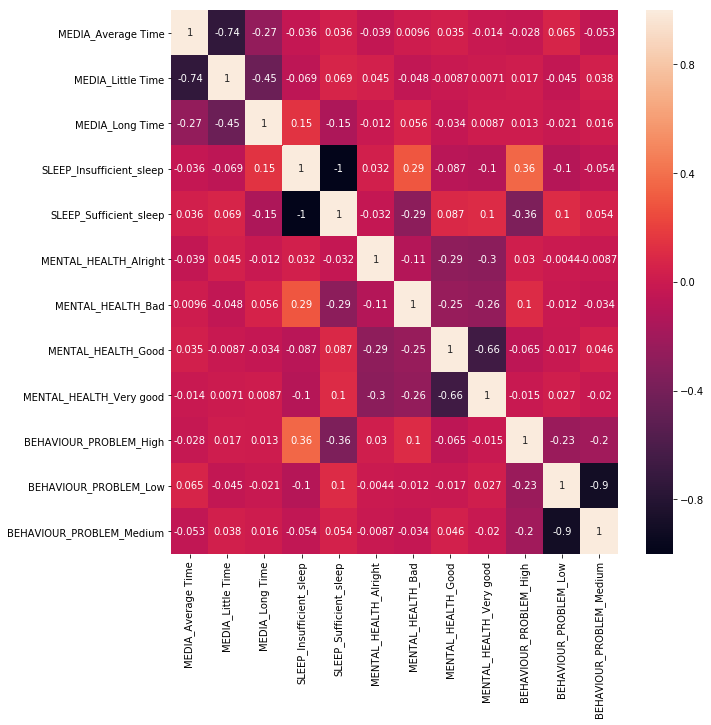

In [51]:
fig= plt.figure(figsize=(10,10))# set the plot size
#get the correlation plot
sns.heatmap(cor,annot=True)

In [52]:
#ANOVA test
# ther was another way to get the correlation for categorical columns
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
s_data['SLEEP'] = enc.fit_transform(s_data['SLEEP'])
s_data['MENTAL_HEALTH'] = enc.fit_transform(s_data['MENTAL_HEALTH'])
s_data['MEDIA'] = enc.fit_transform(s_data['MEDIA'])
s_data['BEHAVIOUR_PROBLEM'] = enc.fit_transform(s_data['BEHAVIOUR_PROBLEM'])
s_data.head(5)

,AGE,GENDER,MEDIA,SLEEP,MENTAL_HEALTH,BEHAVIOUR_PROBLEM
0,13,Male,1,1,0,1
1,15,Female,0,1,1,2
2,14,Male,1,1,2,2
3,13,Male,1,1,2,1
4,14,Male,1,1,0,2


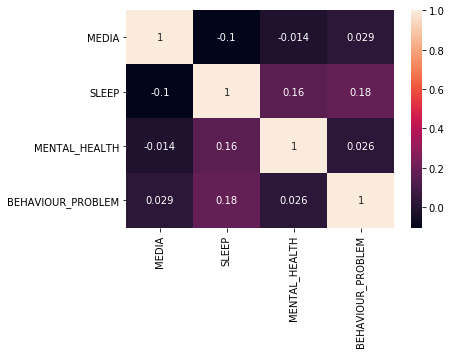

In [53]:
cdata=s_data.drop(columns=['AGE','GENDER'])
corr = cdata.iloc[:, :].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,annot=True)
plt.show()

In [54]:
#I tried to add the ANOVA test and find the following source
#source:https://stackoverflow.com/questions/56267110/categorical-variables-usage-in-pandas-for-anova-and-regression
from sklearn.feature_selection import chi2

res = chi2(cdata.iloc[:,:4], cdata['SLEEP'])
features = pd.DataFrame({
    'features': cdata.columns[:4],
    'chi2': res[0],
    'p-value': res[1]
})
features.head()

,features,chi2,p-value
0,MEDIA,11.022397,9.001758e-04
1,SLEEP,337.000000,2.872272e-75
2,MENTAL_HEALTH,22.830424,1.769424e-06
3,BEHAVIOUR_PROBLEM,16.157784,5.827857e-05


In [55]:
#covariance
s_data[['MEDIA', 'SLEEP']].cov()

,MEDIA,SLEEP
MEDIA,0.415556,-0.025079
SLEEP,-0.025079,0.138628


In [56]:
#correlation
s_data[['MEDIA', 'SLEEP']].corr()

,MEDIA,SLEEP
MEDIA,1.000000,-0.104487
SLEEP,-0.104487,1.000000


The research shows the importance of sleep. It showed that individuals who spent the longest time on social media were more likely to get insufficient sleep compared to those that spent less time on social media. The simulated data is closely matched with the research dataset.

But this study was on small sample so we cannot conclude that insufficient sleep causes problem behaviour, poorer mental health or an increase usage of social media or if these factors are just contributors to less sleep or both. Future studies need to better understand how these factor work together with sleep and look into other variables such as physical health and sleep.

# Conclusion
It was a very challenging task for me although I understood the probability distribution use for data sampling. It took me a long time to decide on the dataset. I couldn't find a topic where I could use other forms of distribution except uniform or normal distribution. I found many resources available online including class tutorials.

I found really interesting facts during my research. I tried to look at different datasets that were available online. This project enhanced my understanding of the data simulation aspect of data science. My lack of knowledge about statistics and probability distributions was a setback for me. But during the course of this project, I learned more about the importance of statistics in Data Analysis.

# Reference
1. https://www.cso.ie/en/releasesandpublications/ep/p-eaads/earningsanalysisusingadministrativedatasources2018/
2. Education Attainment Report 2019 online available at https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/ accessed on 04/12/2019
3. Great divide in household income across the country is laid bare online available at  https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html accessed on 05/12/2019
4. iterate over pandas rows and set column values based on values in other column available online at
https://stackoverflow.com/questions/55114954/iterate-over-pandas-rows-and-set-column-values-based-on-values-in-other-column accessed on 06/12/2019
5. Barry, M.M., Van Lente, E., Molcho. M., Morgan, K., McGee, H., Conroy, R.M., Watson, D., Shelley, E. and Perry, I. (2009) SLÁN 2007: Survey of Lifestyle, Attitudes and Nutrition in Ireland. Mental Health and Social Well-being Report, Department of Health and Children. Dublin: The Stationery Office.
6. Practical Tutorial on Data Manipulation with Numpy and Pandas in Python available at  https://www.hackerearth.com/practice/machine-learning/data-manipulation-visualisation-r-python/tutorial-data-manipulation-numpy-pandas-python/tutorial/ accessed on 11/12/2019
7. A Gentle Introduction to Calculating Normal Summary Statistics available online at https://machinelearningmastery.com/a-gentle-introduction-to-calculating-normal-summary-statistics/ accessed on 13/12/2019

### Sleep dataset

8. Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour availabe online at
https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf accessed on 9/12/2019
9. Find the relationship between two categorical variables available at https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence accessed on  9/12/2019
10. Using Python to Find Correlation Between Categorical and Continuous Variables  available at https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1 accessed on 11/12/2019
11. Chi-Squared Test for Independence in Python available at https://codingdisciple.com/chi-squared-python.html accessed on 11/12/2019
12. Statistical Analysis 5: Chi-squared (2) test for 2-way tables available online at http://www.statstutor.ac.uk/resources/uploaded/coventrychisquared.pdf accessed on 13/12/2019
